# Model Structure-Linear model

資料科學中的線性模型

## 線性回歸（Linear Regression）

Linear regression is a **supervised** learning algorithm, i.e., it can find the relation between $X$ and $y$. Moreover, it is a regression algorithm so that its $y$ is **numeric**. (Note that usually $X$ is numeric as well.)

線性回歸是最基本的預測模型之一屬於監督式學習，它嘗試建立自變量（X）和因變量（Y）之間的線性關係。其模型形式通常表示為
𝑌
=
𝛽
0
+
𝛽
1
𝑋
1
+
⋯
+
𝛽
𝑛
𝑋
𝑛
+
𝜖
Y=β
0
​
 +β
1
​
 X
1
​
 +⋯+β
n
​
 X
n
​
 +ϵ，其中
𝛽
β 表示回歸係數，
𝜖
ϵ 是誤差項。線性回歸的目標是最小化實際值和預測值之間的平方差（即最小二乘法）。

### Make toy dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Create simple data
n = 20
np.random.seed(0)
x = np.random.rand(n)*4
y = 1.05 * x + np.random.randn(n)/5 - 0.5

pd.DataFrame({'x': x, 'y': y})

,x,y
0,2.195254,2.103833
1,2.860757,2.462764
2,2.411054,2.094220
3,2.179533,1.617690
4,1.694619,0.768752
5,2.583576,2.343479
6,1.750349,1.510754
7,3.567092,3.097014
8,3.854651,4.001335
9,1.533766,0.819581


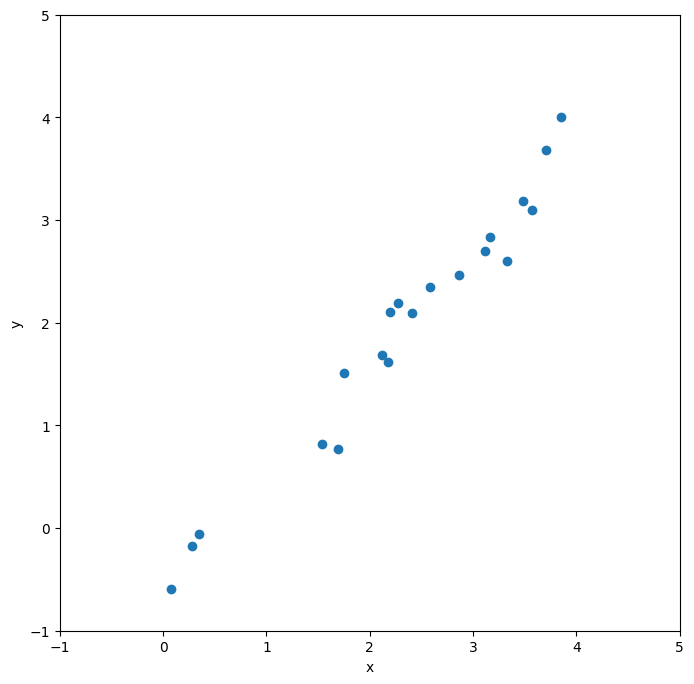

In [ ]:
# plot
plt.figure(figsize=(8, 8))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.show()

### Question about Linear Regression?

* Does the above data look like 'linear'?
* If we do not want to remember the entire data set (although it has only 20 data points), can we use a line to represent the data (i.e., find the relationship between $x$ and $y$)?
* Would a line be appropriate?
* How do we find the 'best' line (i.e., model) to represent the data? Which one (red line or blue line) can best represent the relationship between $x$ and $y$?

### Model and Errors

In [ ]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

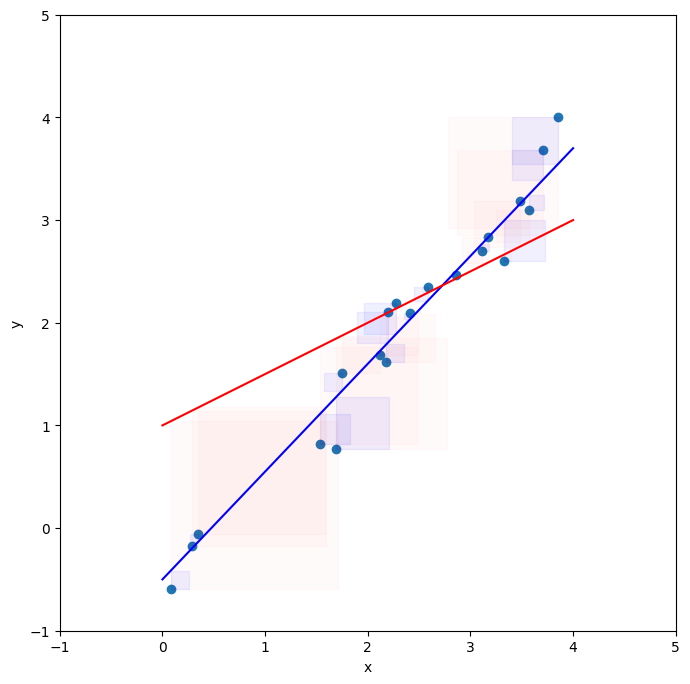

In [ ]:
# Errors
fig, ax = plt.subplots(figsize = (8, 8))
plt.scatter(x, y)
plt.plot([0, 4], [-0.5, 3.7], color="blue") # [x0, x1], [y0, y1] y = 1.05*x-0.5
plt.plot([0, 4], [1, 3], color="red") # [x0, x1], [y0, y1] y = 0.5*x+1
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.gca().set_aspect('equal', adjustable='box')

# blue
errorboxes = [Rectangle((i - (j-(a*i+b)), j - (j-(a*i+b))), j-(a*i+b), j-(a*i+b)) if j > (a*i+b) else Rectangle((i,j), a*i+b-j, a*i+b-j ) for i, j, a, b in zip(x, y, [1.05]*n, [-0.5]*n)]
pc = PatchCollection(errorboxes, facecolor='blue', alpha=0.06, edgecolor='blue')
ax.add_collection(pc)

# red
reb = [Rectangle((i - (j-(a*i+b)), j - (j-(a*i+b))), j-(a*i+b), j-(a*i+b)) if j > (a*i+b) else Rectangle((i,j), a*i+b-j, a*i+b-j ) for i, j, a, b in zip(x, y, [0.5]*n, [1.0]*n)]
rpc = PatchCollection(reb, facecolor='red', alpha=0.02, edgecolor='red')
ax.add_collection(rpc)

plt.show()

### MSE (mean square error) and other errors
* MSE = $\frac{1}{n}\sum_{i=1}^{n}{(y_i - \hat{y_i})^{2}}$

  * $\hat{y_i}$ = $g(x_i)$
  * Linear regression model with one feature: $g(x_1)$ = $ax_1+b$
  * General Form: $g(X)$ = $\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + ...$, and $\theta$ is the set of all factors
  * Or $g(X) = W^T \cdot X$, and $W$ stands for weight vector; $T$ is transpose.

* RMSE = $\sqrt{\text{MSE}}$

* MAE = $\frac{1}{n}\sum_{i=1}^{n}{|y_i - \hat{y_i}|}$

* Which evaluation is better?

### Linear Regression by sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

#initantiate the linear regression
linearRegModel = LinearRegression()

# X should look like [[2.195254], [2.860757], ...]
# since X may have more than one features
X = x.reshape(-1, 1)

#fit the model to the training data (learn the coefficients)
linearRegModel.fit(X, y)

print("Intercept is ", linearRegModel.intercept_)

# If multiple features in X, then we get a list of coefficient.
print("coefficient is ", linearRegModel.coef_)

Intercept is  -0.607541842192133
coefficients  is  [1.09674556]


In [ ]:
# prediction

predicted_y = linearRegModel.predict(X)
df = pd.DataFrame({'x': x, 'y': y,
                   'y_hat': predicted_y,
                   'y_blu': 1.05 * x -0.5,
                   'y_red': 0.5 * x + 1.0 })

In [ ]:
print("MSE_y_hat", sum(np.power(df['y']-df['y_hat'], 2))/n)
print("MSE_y_blu", sum(np.power(df['y']-df['y_blu'], 2))/n)
print("MSE_y_red", sum(np.power(df['y']-df['y_red'], 2))/n)

MSE_y_hat 0.05370017117303051
MSE_y_blu 0.05636326479205489
MSE_y_red 0.5355882998620926


In [ ]:
print("MAE_y_hat", sum(np.abs(df['y']-df['y_hat']))/n)
print("MAE_y_blu", sum(np.abs(df['y']-df['y_blu']))/n)
print("MAE_y_red", sum(np.abs(df['y']-df['y_red']))/n)

MAE_y_hat 0.18869548427776175
MAE_y_blu 0.1854476433817208
MAE_y_red 0.5396609777352447


### MAE or MSE (Colab AI)

**MSE (Mean Squared Error)**

* Advantages:
  * MSE penalizes large errors more heavily than MAE. This can be important if you are concerned about outliers in your data.
  * MSE is a differentiable function, which makes it easier to use with gradient-based optimization algorithms.
* Disadvantages:
  * MSE is more sensitive to outliers than MAE. This can be a problem if you have a lot of outliers in your data.
  * MSE can be misleading if your data is skewed. This is because MSE gives more weight to larger errors, which can skew the results.

**MAE (Mean Absolute Error)**

* Advantages:
  * MAE is less sensitive to outliers than MSE. This can be important if you have a lot of outliers in your data.
  * MAE is not affected by skewness in the data.
* Disadvantages:
  * MAE does not penalize large errors as heavily as MSE. This can be a problem if you are concerned about outliers in your data.
  * MAE is not a differentiable function, which makes it more difficult to use with gradient-based optimization algorithms.

Here are some additional factors to consider when choosing an error metric:

* **Interpretability**: MAE is often easier to interpret than MSE, as it represents the average absolute difference between the predicted and actual values.
* **Robustness**: MAE is more robust to outliers than MSE.
* **Computational efficiency**: MSE is computationally more efficient than MAE.

MSE（均方誤差）

優點：
- MSE對大誤差的懲罰比MAE更嚴重。如果您關注數據中的異常值，這點非常重要。
- MSE是一個可微分的函數，使其更容易與基於梯度的優化算法一起使用。

缺點：
- MSE對異常值更敏感。如果數據中有很多異常值，這會成為一個問題。
- 如果數據偏態，MSE可能會誤導。因為MSE給予較大誤差更多的權重，這可能會使結果偏斜。

MAE（平均絕對誤差）

優點：
- MAE對異常值的敏感度比MSE低。如果數據中有很多異常值，這點非常重要。
- MAE不受數據偏態的影響。

缺點：
- MAE對大誤差的懲罰不如MSE嚴重。如果您關注數據中的異常值，這會成為一個問題。
- MAE不是可微分的函數，這使得它與基於梯度的優化算法一起使用時更困難。

選擇誤差指標時還需考慮一些其他因素：

- 可解釋性：MAE通常比MSE更容易解釋，因為它表示了預測值和實際值之間的平均絕對差異。
- 魯棒性：MAE比MSE對異常值更具魯棒性。
- 計算效率：MSE在計算上比MAE更高效。

### Find $\theta^*$


* Find the minimum value of MSE by differentiation!
  * MSE = $\frac{1}{n}\sum_{i=1}^{n}{(y_i - \hat{y_i})^{2}}$
  * Let $\hat{y_i} = \theta_0 + \theta_1 x_i $ (or $\hat{y} = ax+b$, i.e., linear model)
  * MSE = $\frac{1}{n}\sum_{i=1}^{n}{(y_i - (\theta_0 + \theta_1 x_i))^{2}}$
  * MSE = $\frac{1}{n}\sum_{i=1}^{n}{x_{i}^{2}\theta_{1}^{2} + \theta_{0}^{2} + 2 x_i \theta_1 \theta_0 - 2 x_{i} y_{i} \theta_1 - 2 y_i \theta_0  + y_{i}^{2} }$
  * MSE becomes a two variables ($\theta_0$, $\theta_1$) polynomial function of degree 2.
    * From the training data, we know all $x_i$ and $y_i$.
    * MSE is a 3D surface with a minmal value.

In [ ]:
f1 = sum(pow(df['x'], 2))/n
f2 = n/n
f3 = 2.0 * sum(df['x'])/n
f4 = -2.0 * sum(df['x'] * df['y']) / n
f5 = -2.0 * sum(df['y'])/n
f6 = sum(pow(df['y'], 2))/n
print(f1, f2, f3, f4, f5, f6)

6.629363560140185 1.0 4.652438596180779 -11.714899026158847 -3.8874577035887454 5.296935328404828


MSE = $ 6.63 \theta_{1}^{2} + \theta_{0}^{2} + 4.65 \theta_1 \theta_0 - 11.71 \theta_1 - 3.89\theta_0  +5.30 $

How to find $\theta^*$ so that MSE has minimal value? Hint: MSE is a **convex function**.

### Gradient Descent

In [ ]:
# Draw the 3D surface (a, b, mse)

a_range = np.linspace(-2, 4, 11) # change the grid granularity from 11 to 22
b_range = np.linspace(-2, 4, 11) # change the grid granularity from 11 to 22
A, B = np.meshgrid(a_range, b_range)

min_z = 1000
Z = []
for a in a_range:
  z_value = []
  for b in b_range:
    this_mse = np.sum(np.power(y - (a*x+b), 2))/len(y)
    z_value.append(this_mse)
    if this_mse < min_z:
      min_z = this_mse
      best_a, best_b = a, b
  Z.append(z_value)

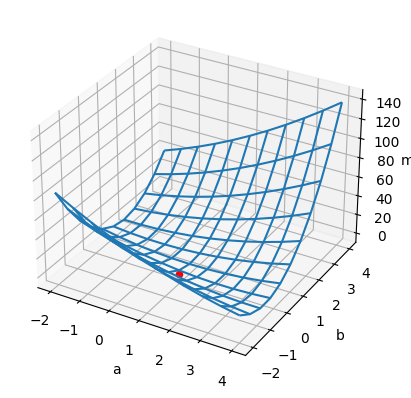

In [ ]:
from mpl_toolkits.mplot3d import axes3d

fig_3d = plt.figure()
ax = fig_3d.add_subplot(111, projection='3d')
ax.plot_wireframe(A, B, np.array(Z))
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('mse')

# best mse on grid
ax.scatter3D(best_a, best_b, min_z, color='red')

plt.show()

In [ ]:
# answer from above grid
print("The best a, b, and mse on grid are:")
print(best_a, best_b, min_z)

# answer from math
print("\nThe actual a*, b*, and mse* are:")
opt_a = linearRegModel.coef_[0]
opt_b = linearRegModel.intercept_
opt_mse = np.sum(np.power(y - (opt_a * x + opt_b), 2)/len(y))

print(opt_a, opt_b, opt_mse)

The best a, b, and mse on grid are:
1.0 -0.20000000000000018 0.0984036838677576

The actual a*, b*, and mse* are:
1.096745563103557 -0.607541842192133 0.0537001711730305


You shuold not bruce-forcefully try all ($a$, $b$), i.e., ($\theta_1, \theta_0$), to find the optimal MSE.

The partial differential is much quicker to find the minimum value of each dimension.

Using a random pair ($a$, $b$) <u>at time 0</u> as the initial trial point, and of course, the corresponding $z$ is unlikely the optimal MSE.

However, you can do partial differential on the a-axis and b-axis, respectively.

So that we can know that starting from the current ($a$,$b$) <u>at time $t$</u>, which direction on the a-axis and b-axis will lead to a smaller $z$. And <u>at time $t$+1</u>, we can choose a better ($a$, $b$) by considering the direction and make one step ($\gamma$, a.k.a. learning rate) toward the optimized $z$. And so on so forth (many times) to find the optimized $z$ with ($a^*$, $b^*$).

MSE = $\frac{1}{n}\sum_{i=1}^{n}{x_{i}^{2}\theta_{1}^{2} + \theta_{0}^{2} + 2 x_i \theta_1 \theta_0 - 2 x_{i} y_{i} \theta_1 - 2 y_i \theta_0  + y_{i}^{2} }$

$\theta_{i}^{(t+1)} = \theta_{i}^{(t)} - \gamma \frac{\partial \text{MSE}(\theta_{0},\theta_{1})}{\partial \theta_i}$

### Question about Gradient Descent

* Sometimes, MSE is defined as follows. Why?
  * MSE' = $\frac{1}{2n}\sum_{i=1}^{n}{(y_i - \hat{y_i})^{2}}$
* Could GD find the minimum $z$?
* Waht is $\gamma$ (i.e., learning rate)?
* Is there any other faster way to find the minimum $z$?

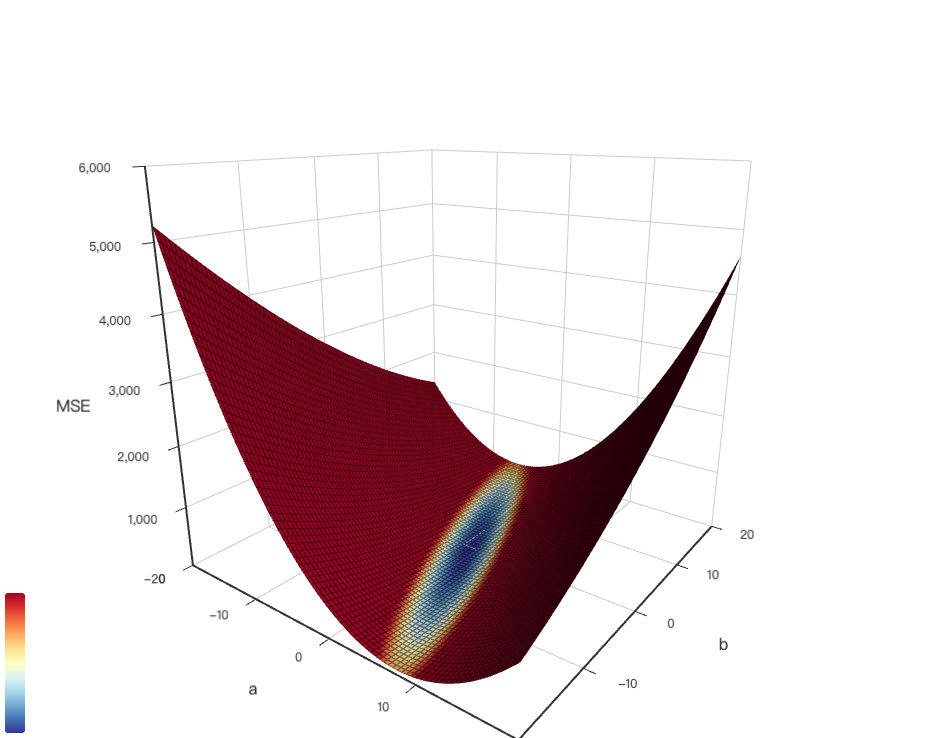

Additional Materials

* [Linear Regression using Python](https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2)

### Non-linear Data using Linear Regression

在面對非線性數據時，傳統的線性回歸模型可能不會提供最佳的預測效果，因為它只能捕捉到數據中的線性關係。然而，我們可以通過幾種方法來調整和擴展線性回歸模型，使其能夠更好地處理非線性數據。

### 1. 特徵變換（Feature Transformation）
最常見的方法是對特徵進行變換，以引入非線性。這可以通過添加多項式項（如平方項和立方項）、對數變換、指數變換等來實現。

#### 實作示例：
假設原始數據中有一個特徵
𝑋
X。我們可以將
𝑋
2
X
2
  和
𝑋
3
X
3
  加入模型，形成一個多項式回歸模型：
𝑌
=
𝛽
0
+
𝛽
1
𝑋
+
𝛽
2
𝑋
2
+
𝛽
3
𝑋
3
+
𝜖
Y=β
0
​
 +β
1
​
 X+β
2
​
 X
2
 +β
3
​
 X
3
 +ϵ
這種模型可以捕捉到更複雜的非線性關係。

### 2. 分段線性回歸（Piecewise Linear Regression）
另一種方法是使用分段線性回歸，這種方法將數據分成幾個段落，並在每個段落中獨立擬合線性回歸。這可以通過引入虛擬變量來實現，這些虛擬變量會在特定的範圍內取值為1，而在其他範圍內取值為0。

#### 實作示例：
假設我們想在
𝑋
=
𝑐
X=c 處對數據進行分割，可以引入虛擬變量
𝐷
D，其中
𝐷
=
1
D=1 如果
𝑋
>
𝑐
X>c 否則
𝐷
=
0
D=0：
𝑌
=
𝛽
0
+
𝛽
1
𝑋
+
𝛽
2
𝐷
+
𝛽
3
𝑋
𝐷
+
𝜖
Y=β
0
​
 +β
1
​
 X+β
2
​
 D+β
3
​
 XD+ϵ

### 3. 基函數回歸（Basis Function Regression）
基函數回歸是將原始特徵通過一系列函數（基函數）轉換成新的特徵集，然後在這些新特徵上進行線性回歸。常見的基函數包括多項式基、三角基、和高斯基。

#### 實作示例：
如果使用高斯基函數，模型可以寫為：
𝑌
=
𝛽
0
+
𝛽
1
𝑒
−
(
𝑋
−
𝜇
1
)
2
/
(
2
𝜎
2
)
+
𝛽
2
𝑒
−
(
𝑋
−
𝜇
2
)
2
/
(
2
𝜎
2
)
+
𝜖
Y=β
0
​
 +β
1
​
 e
−(X−μ
1
​
 )
2
 /(2σ
2
 )
 +β
2
​
 e
−(X−μ
2
​
 )
2
 /(2σ
2
 )
 +ϵ
其中，
𝜇
μ 和
𝜎
σ 定義了高斯函數的位置和寬度。

透過這些方法，線性回歸模型可以被有效地擴展來擬合非線性數據，這樣做可以提高模型的靈活性和預測能力。在實際應用中，選擇哪種方法取決於數據的特性和具體需求。

In [ ]:
import pandas as pd

# anscombe.json can be found in the same directory in GDrive.
# You can "Mount Drive" to access the file in your GDrive.

try:
  anscombe_df = pd.read_json('/content/sample_data/anscombe.json')
  print("anscombe.json is loaded.")
except:
  print("Check file?")

anscombe.json is loaded.


In [ ]:
print(anscombe_df[anscombe_df.Series=="I"])

   Series   X      Y
0       I  10   8.04
1       I   8   6.95
2       I  13   7.58
3       I   9   8.81
4       I  11   8.33
5       I  14   9.96
6       I   6   7.24
7       I   4   4.26
8       I  12  10.84
9       I   7   4.81
10      I   5   5.68


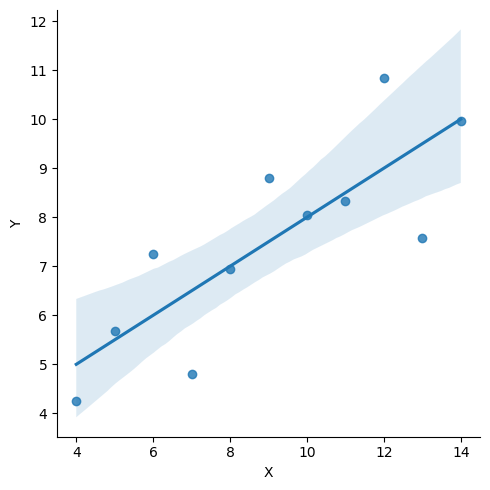

In [ ]:
import seaborn

seaborn.lmplot(x='X', y='Y', data=anscombe_df[anscombe_df.Series == 'I'])
#print("It looks like a liner model which is good enough.")

In [ ]:
print(anscombe_df[anscombe_df.Series=="II"])

   Series   X     Y
11     II  10  9.14
12     II   8  8.14
13     II  13  8.74
14     II   9  8.77
15     II  11  9.26
16     II  14  8.10
17     II   6  6.13
18     II   4  3.10
19     II  12  9.13
20     II   7  7.26
21     II   5  4.74


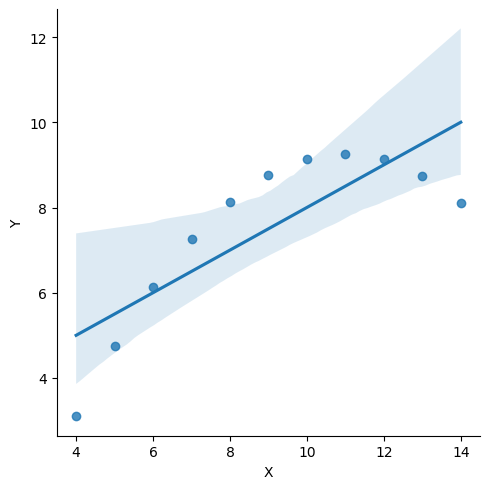

In [ ]:
seaborn.lmplot(x='X', y='Y', data=anscombe_df[anscombe_df.Series == 'II'])
#print("model looks not that good, we need polynomial regression.")

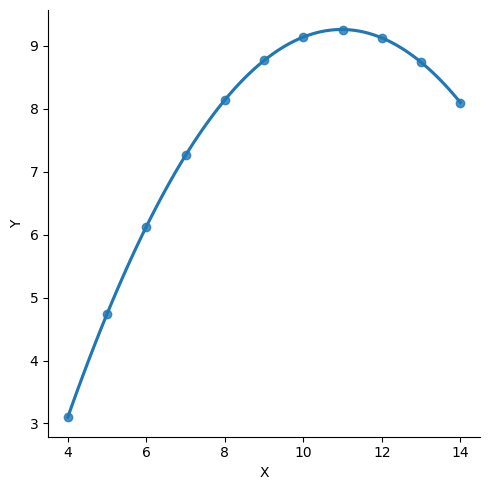

In [ ]:
seaborn.lmplot(x="X", y="Y", data=anscombe_df[anscombe_df.Series == 'II'], order=2)
#print("much better")

In [ ]:
print(anscombe_df[anscombe_df.Series=="III"])

   Series   X      Y
22    III  10   7.46
23    III   8   6.77
24    III  13  12.74
25    III   9   7.11
26    III  11   7.81
27    III  14   8.84
28    III   6   6.08
29    III   4   5.39
30    III  12   8.15
31    III   7   6.42
32    III   5   5.73


Outliers! It is a big problem!


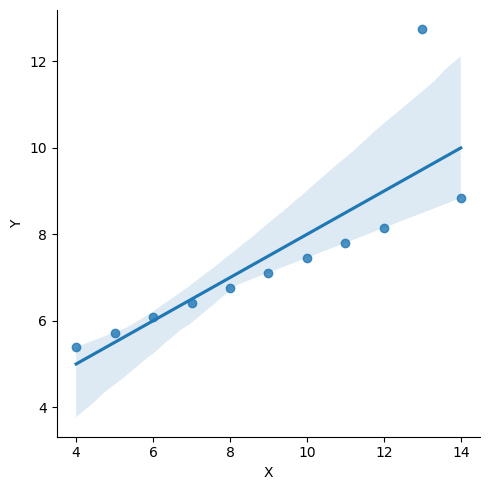

In [ ]:
seaborn.lmplot(x='X', y='Y', data=anscombe_df[anscombe_df.Series == 'III'])
print("Outliers! It is a big problem!" )

However, you should not use some magic functions that you do not know much about them.


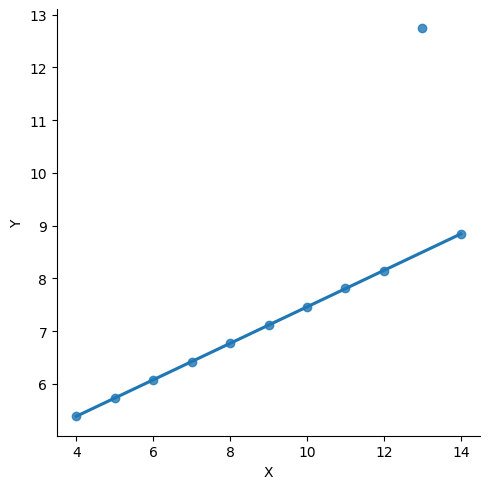

In [ ]:
# In the presence of outliers, it can be useful to fit a robust regression,
# which uses a different loss function to downweight relatively large residuals.

seaborn.lmplot(x="X", y="Y", data=anscombe_df[anscombe_df.Series == 'III'], robust=True, ci = None)
print("However, you should not use some magic functions that you do not know much about them.")

# https://seaborn.pydata.org/generated/seaborn.lmplot.html



---



Linear Regression(線性迴歸)、Lasso、Ridge(嶺迴歸)是三個最常見的迴歸方法，同樣都是為了求出一組最佳參數w來預測Y，後兩者比較前者線性迴歸而言，增加了對迴歸權重大小的懲罰值，進而降低了模型過擬合的風險。

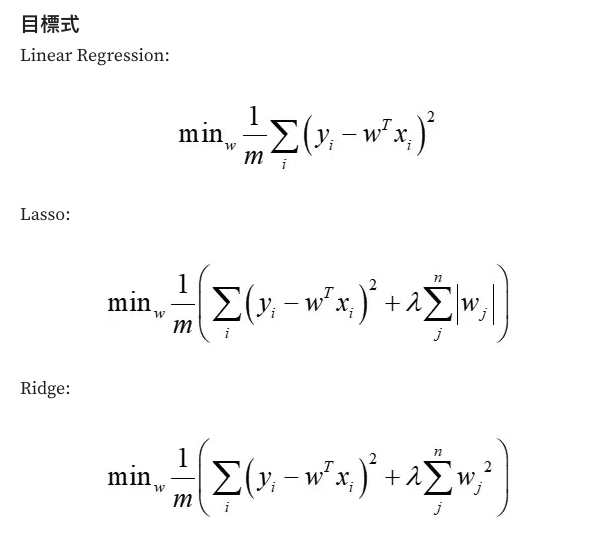



---



## Lasso回歸（Lasso Regression）

Lasso回歸屬於線性回歸的一種，為正規化迴歸(Regularized Regression)。是一種通過添加一個等於係數絕對值之和的懲罰項到傳統線性回歸的損失函數中，來進行特徵選擇的技術。

目的：讓模型中不要存在過多的參數，當模型參數越多時懲罰函數的值會越大



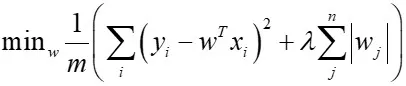

優點:

與Ridge 一樣，會將具有相關性的變數推向彼此並避免使的模型參數中出現一個有極大正係數與另一個極大負係數的一起出現的情況。

與Ridge最大的差別在於，Lasso會將不具有影響力的迴歸係數變成0，等於可以自動進行Feature selection


缺點:

當移除掉變數同時也會犧牲掉模型的正確性，所以透過Lasso雖然可以產生的更清楚與簡潔的模型，提升模型的正確性，但同時也會降低模型的推廣性。


簡單範例

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 加載數據
data = fetch_california_housing()
X = data.data
y = data.target

# 數據標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [ ]:
# 訓練Lasso回歸模型
lasso = Lasso(alpha=0.1)  # alpha是正則化強度
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

# 計算MSE和顯示迴歸係數
lasso_mse = mean_squared_error(y_test, lasso_pred)
print("Lasso MSE:", lasso_mse)
print("Lasso coefficients:", lasso.coef_)


Lasso MSE: 0.6647101868107819
Lasso coefficients: [ 0.70674021  0.10661406 -0.          0.         -0.         -0.
 -0.01039352 -0.        ]


## Ridge回歸（Ridge Regression）

Ridge回歸屬於線性回歸的一種，為正規化迴歸(Regularized Regression)。通過添加一個等於係數平方和的懲罰項到損失函數中，可以減少模型中變數的多重共線性問題。



目的：讓模型中不要存在過多的參數，針對過多參數的模型進行懲罰。



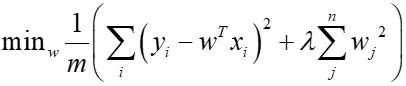

優點:

會將具有相關性的變數推向彼此並避免使的模型參數中出現一個有極大正係數與另一個極大負係數的一起出現的情況。

不相干變數的迴歸係數會被逼近為0(不會剛好等於0)，我們可以藉此降低資料集中的雜訊。

缺點:

Ridge模型會保留所有變數，因此無法像Lasso模型可做變數的篩選，因為Ridge只能將不具影響力的變數之回歸係數變成趨近於0(但不會剛好等於0)，因此最後的模型可能還是會存在一些不重要的參數，多多少少還是會影響模型最後的正確性。

In [ ]:
# 訓練Ridge回歸模型
ridge = Ridge(alpha=0.1)  # alpha是正則化強度
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

# 計算MSE和顯示迴歸係數
ridge_mse = mean_squared_error(y_test, ridge_pred)
print("Ridge MSE:", ridge_mse)
print("Ridge coefficients:", ridge.coef_)


Ridge MSE: 0.5305652108141548
Ridge coefficients: [ 8.46955078e-01  1.21857693e-01 -3.02049781e-01  3.68943006e-01
 -8.75447248e-04 -3.50008411e-02 -8.93868017e-01 -8.68800325e-01]


小結：

兩模型比較

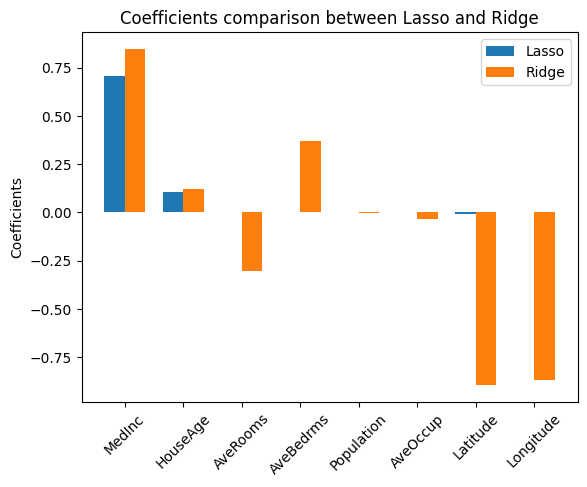

In [ ]:
# 視覺化迴歸係數
labels = data.feature_names
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lasso.coef_, width, label='Lasso')
rects2 = ax.bar(x + width/2, ridge.coef_, width, label='Ridge')

ax.set_ylabel('Coefficients')
ax.set_title('Coefficients comparison between Lasso and Ridge')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.show()



Lasso模型通過將一些係數設為零，從而提供了一個更簡潔的模型，這有助於進行特徵選擇。而Ridge模型則傾向於保留所有特徵，但係數被壓縮，從而減少了模型對單一變量的敏感度。在實際應用中，選擇哪種模型取決於你對模型簡潔性和預測精確性的需求。


從模型結果可以看到 lasso 模型趨避了多特徵，只保留兩項最重要的特徵，也能得到很不錯的結果








---



Lasso（Least Absolute Shrinkage and Selection Operator）和Ridge回歸都是線性回歸的擴展，它們通過添加正則化項來控制模型的複雜度，但它們在處理參數時的方法和目的存在顯著差異。這些差異來自於它們使用的正則化項的不同性質。

### Lasso回歸（L1正則化）
Lasso回歸使用的是L1正則化，這意味著它向損失函數添加了一個等於參數絕對值之和的懲罰項（\(λ∑∣β
i
​
 ∣)）。L1正則化的關鍵特性是它傾向於產生稀疏的解：

- **參數稀疏化**：在L1正則化中，隨著懲罰項的增加，一些迴歸係數會變成確切的零。這是因為L1懲罰鼓勵系統用盡可能少的參數來擬合數據，從而導致那些對模型貢獻較小的特徵的係數被完全消除。這種特性使Lasso不僅可以用於迴歸預測，還能進行特徵選擇，自動移除不重要的變數。

### Ridge回歸（L2正則化）
Ridge回歸使用的是L2正則化，即向損失函數添加了一個等於參數平方和的懲罰項（λ∑β
i
2
​
）。L2正則化的特性則與L1大有不同：

- **參數收縮**：L2正則化傾向於將參數均勻地向更小的值收縮，而不會完全將它們設為零。這個懲罰項對所有參數都是公平的，導致沒有任何一個參數會完全消失，這有助於處理參數間的多重共線性問題。即使某些參數的迴歸係數很小，它們仍然會被保留在模型中，這使得我們可以看到所有特徵對模型的相對影響。


不過就功能性來說，當使用者的模型中具有過多的參數，想自動化把不重要的變數給移除，那應該要選擇Lasso model；如果我們想找到模型當中重要的參數可以透過Ridge model來去辨別哪些參數是重要的，因為不重要的參數會在模式當中迴歸係數會趨近於0，但因為不會真的消失，所以可以根據迴歸係數的大小來得到重要參數的排名。

https://roger010620.medium.com/linear-regression-lasso-ridge%E4%BB%8B%E7%B4%B9-%E9%99%84python-code-76e89af4dce9

## 邏輯回歸（Logistic Regression）

邏輯回歸用於預測二元結果（是/否、成功/失敗等）。它使用Sigmoid函數將線性結果映射到（0,1）範圍內，表示概率。

Logistic Regression(邏輯斯回歸)很多人看名字以為是回歸的模型，但其實是一個分類的模型，名字取的不好很容易讓人誤解ＸＤ。Logistic Regression則是一個平滑的曲線，當w0*x0+w1*x1+…+wn*xn越大時判斷成A類的機率越大，越小時判斷成A類的機率越小。由於是二元分類，如果判斷成A類的機率越小，B類的機率越大(判斷成B類的機率 = 1 - 判斷成A的機率)。



首現先介紹一下Sigmoid函數，也稱為logistic function，這個函數的y 的值介於 0到1，這樣的分布也符合機率是在0到1的範圍中。或許有人會覺得疑惑，Logistic Regression為什麼要用這個Logistic函數？其實也可以改用其他符合0到1的函數（因為機率的值是介於0到1），只是Logistic 函數是這種介於0~1的平滑函數中相對簡單的。

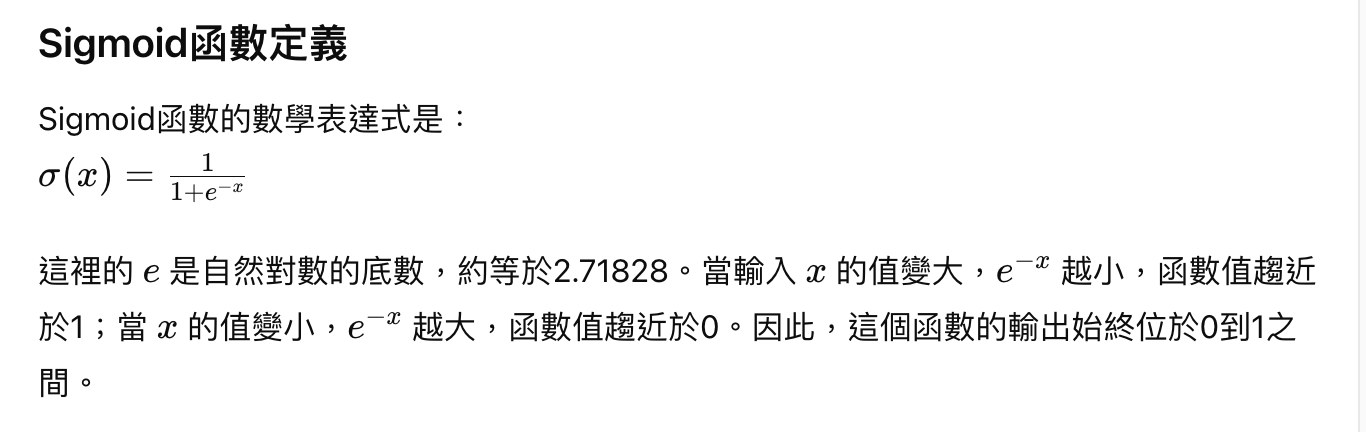

依下圖所示，當Z=0時判斷成+1類(A類)的機率為0.5，因此只要 z >0 判斷成 A類的機率就會>0.5 ，我們也就把它判斷成+1類(A類)。(這邊跟上一章perceptron一樣，只是多了機率的資訊) 如果z≤0 判斷成A類的機率就≤0.5 ，因此我們就把他判斷成-1類(B類)



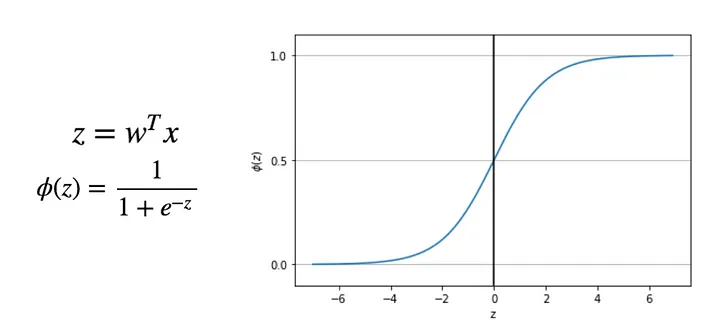

使用scikit-learn自帶的乳腺癌數據集（Breast Cancer dataset），這是一個二元分類問題，目標是根據細胞核的特徵來預測腫瘤是良性（benign）還是惡性（malignant）。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 加載數據
data = load_breast_cancer()
X = data.data
y = data.target

# 選擇兩個特徵以便於視覺化
X = X[:, :2]

# 數據標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 創建並訓練模型
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.91


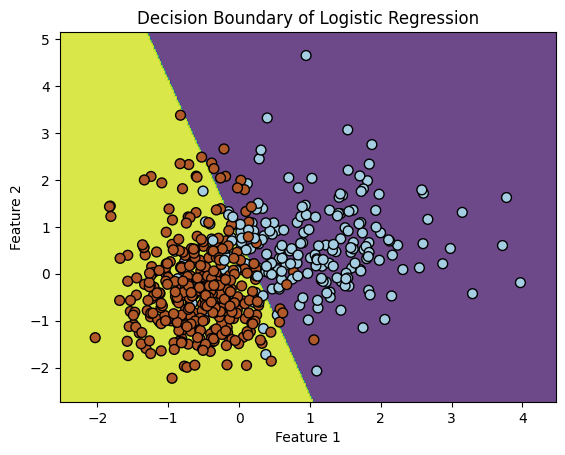

In [ ]:
# 模型評估
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 視覺化決策邊界
x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Logistic Regression')
plt.show()


[[資料分析&機器學習] 第3.3講：線性分類-邏輯斯回歸(Logistic Regression) 介紹
](https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-3%E8%AC%9B-%E7%B7%9A%E6%80%A7%E5%88%86%E9%A1%9E-%E9%82%8F%E8%BC%AF%E6%96%AF%E5%9B%9E%E6%AD%B8-logistic-regression-%E4%BB%8B%E7%B4%B9-a1a5f47017e5)

[順序羅吉斯迴歸 Ordinal Logistic Regression 介紹與解讀
](https://medium.com/@shawn678965/%E9%A0%86%E5%BA%8F%E7%BE%85%E5%90%89%E6%96%AF%E5%9B%9E%E6%AD%B8-ordinal-logistic-regression-%E4%BB%8B%E7%B4%B9%E8%88%87%E8%A7%A3%E8%AE%80-0ccf56b1ce35)

# References